### 1. Imports

In [1]:
# these are some Jupyter-specific settings. Only really relevant when drawing charts on high-res screens.
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# imports...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Plot styling
plt.style.use('ggplot')

### 2. Load Data

We use the same data-set and method as in Excercise 1 _(Load CSV Data)_

In [2]:
df = pd.read_csv('data/train.csv')

df = df.drop(columns='Id')

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3. Examine the Data (correlations)

Python has some amazing plotting libraries available free of use. One of these is Seaborn _(built untop of Matplotlib)_, which is a statistical plotting tool.

Since we're doing simple regression, I'd say we'd be smart to see if we can model the saleprice of the house by the overall quality of the material and finish of the house. 

The results below clearly states that there are high positive levels of correlation between `OverallQual` our dependent variable `SalePrice`.

Thus we're interested in the following relationship:

$$\text{SalePrice}=\beta_0+\beta_1\cdot\text{OverallQual}+u$$

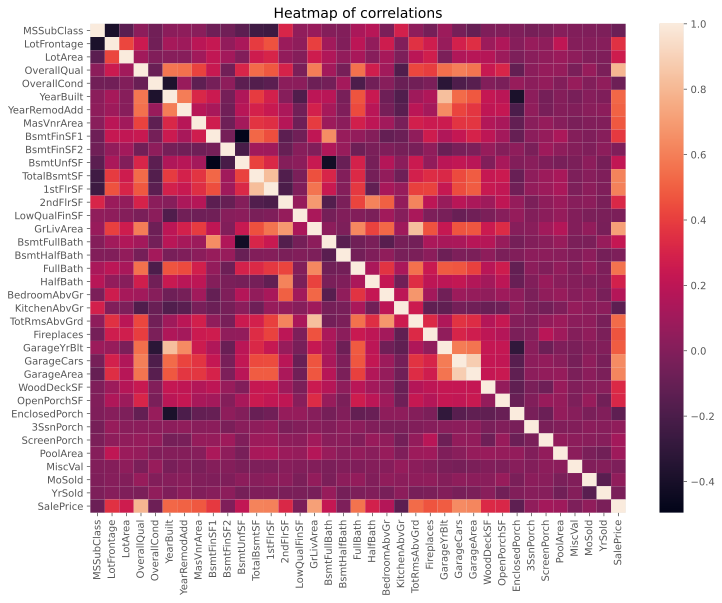

In [3]:
# Creates an empty figure to place the plot in. Only needed to have adjudsted size
plt.figure(figsize=(12,9))

# Set title of plot
plt.title('Heatmap of correlations', fontsize=14)

# Use the seaborn library to create the heatmap - passing the correlation between all variables as argument
sns.heatmap(df.corr(), annot=False, vmax=1)

# Explicitly show plot in-line (not required)
plt.show()

#### Plotting

Before we fit the model, let's look at the distributions of the given variables - again using the seaborn package.

* We find - quite as expected - that SalePrice is somewhat right-skewed and OverallQual some kind of near-normal distribution.

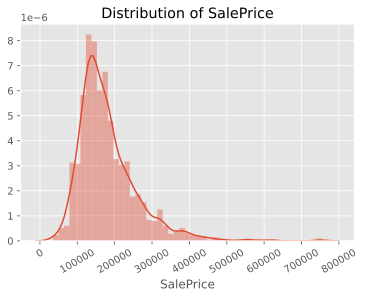

In [4]:
sns.distplot(df['SalePrice']).set_title('Distribution of SalePrice')

# rotate x labels
plt.xticks(rotation=30)

plt.show()

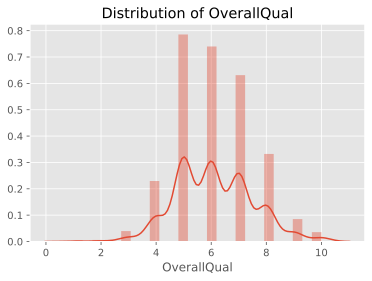

In [5]:
sns.distplot(df['OverallQual']).set_title('Distribution of OverallQual')

plt.show()

### 4. Fitting the model

Let's fit the model and see, which dependancy or significance we find.

Using the statsmodels package and it's OLS class, we can get a standard Stata-like output right in the Jupyter notebook.

In [6]:
reg = smf.ols('SalePrice ~ OverallQual', data=df).fit()

reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                 OLS                Adj. R-squared:       0.625     
Dependent Variable:    SalePrice          AIC:                  35657.4925
Date:                  2020-09-05 13:51   BIC:                  35668.0649
No. Observations:      1460               Log-Likelihood:       -17827.   
Df Model:              1                  F-statistic:          2437.     
Df Residuals:          1458               Prob (F-statistic):   2.19e-313 
R-squared:             0.626              Scale:                2.3642e+09
--------------------------------------------------------------------------
               Coef.     Std.Err.    t     P>|t|     [0.025       0.975]  
--------------------------------------------------------------------------
Intercept   -96206.0795 5756.4074 -16.7129 0.0000 -107497.8044 -84914.3546
OverallQual  45435.8026  920.4302  49.3637 0.0000   43630.2936  47241.3116
--------------------------------------------------------------------------
Omnibus:                591.594         Durbin-Watson:            1.990   
Prob(Omnibus):          0.000           Jarque-Bera (JB):         5872.098
Skew:                   1.607           Prob(JB):                 0.000   
Kurtosis:               12.284          Condition No.:            29      
==========================================================================

"""

#### Interpretation

We see from the regression output, that we have a reasonably high $R^2$ and that everything is quite significant. There may be some major _omitted variable bias_ though - but we'll cover this in the next chapter when we talk about multivariate regression.

If we're interested in grahically illustrating this simple relationsship, we can use the `regplot` tool from the Seaborn package - we also see here, that the linear relationsship is quite strong.

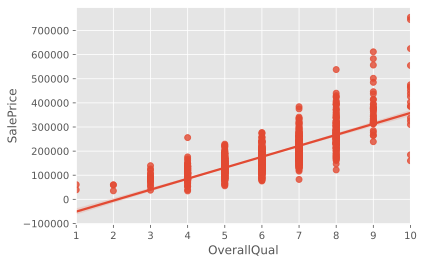

In [7]:
sns.regplot(x='OverallQual', y='SalePrice', data=df)
plt.show() 

### 5. Manual Calculation (OLS)

We can alternatively calculate the OLS for simple regression manually using python as well. Fortunetly we won't need any linear algebra for simple regression.

If we consider the OLS estimator of $\beta_0$ and $\beta_1$ and we define the residual $\hat{u}_{i}=\left(b_{0},b_{1}\right)$ where we use $\left(b_{0},b_{1}\right)$ as estimates for $\left(\beta_{0},\beta_{1}\right).$ we can then express our residuals as,

$$\hat{u}_{i}\left(b_{0},b_{1}\right)=y_{i}-\left(b_{0}+b_{1}x_{i}\right)$$

The OLS estimator $\left(\hat{\beta}_{0},\hat{\beta}_{1}\right)$ are the values of $\left(b_{0},b_{1}\right)$ that minimize the sum of squared residuals

$$\min_{b_{0},b_{1}}\sum_{i=1}^{n}\left[y_{i}-\left(b_{0}+b_{1}x_{i}\right)\right]^{2}$$

This yields the following FOC's,

$$\frac{\partial\sum_{i=1}^{n}\left[y_{i}-\left(\widehat{\beta}_{0}+\widehat{\beta}_{1}x_{i}\right)\right]^{2}}{\partial b_{0}}=0$$

and, 

$$\frac{\partial\sum_{i=1}^{n}\left[y_{i}-\left(\widehat{\beta}_{0}+\widehat{\beta}_{1}x_{i}\right)\right]^{2}}{\partial b_{1}}=0$$

These yield,

$$-2\sum_{i=1}^{n}\left[y_{i}-\left(\widehat{\beta}_{0}+\widehat{\beta}_{1}x_{i}\right)\right]=0$$

and,

$$-2\sum_{i=1}^{n}x_{i}\left[y_{i}-\left(\widehat{\beta}_{0}+\widehat{\beta}_{1}x_{i}\right)\right]=0$$

If we apply some algebra among statistical assumptions we're left with an expression for $\widehat{\beta}_{0}$ and $\widehat{\beta}_{1}$.

$$\widehat{\beta}_{1}=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}$$

$$\hat{\beta}_{0}	=\bar{y}-\hat{\beta}_{1}\bar{x},\text{ where }\bar{y}\equiv\frac{1}{n}\sum y_{i}\text{ and }\bar{x}\equiv\frac{1}{n}\sum x_{i}$$

__Anyhow__ if we estimate this, we get the following linear equation,

$$\hat{y}=\hat{\beta}_{0}+\hat{\beta}_{1}x$$

Let's try it out.

In [8]:
# Using Numpy vectors make all these calculations super easy because calculations are run on all elements in the vector
x_i = df['OverallQual'].to_numpy()
y_i = df['SalePrice'].to_numpy()

x_bar = np.mean(df['OverallQual'])
y_bar = np.mean(df['SalePrice'])

beta_hat_1 = ((x_i - x_bar) * (y_i - y_bar)).sum() / ((x_i - x_bar)**2).sum()
beta_hat_0 = y_bar - beta_hat_1 * x_bar

print(f'Beta_1: {round(beta_hat_1, 2)}')
print(f'Beta_0: {round(beta_hat_0, 2)}')

Beta_1: 45435.8
Beta_0: -96206.08


#### Results

As one can see we get the exact same results for our beta-estimates as when we ran the statsmodels regression package earlier.